In [2]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#HTML Download using requests
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
headers = {
 "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
response = requests.get(url, headers=headers)
html =response.text

In [5]:
with open (f"html/page1.html", "w", encoding="utf-8") as f:
    f.write(response.text)

In [6]:
# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
table = soup.find("table", {"class": "wikitable"})
rows = table.find_all("tr")[1:]  # Skip table header

In [7]:
# Extract Countries and GDP Values 
countries = []
gdps = []

for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 2:
        country = cols[0].text.strip()
        if "world" in country.lower():
            continue
        gdp_raw = cols[1].text.strip().split("[")[0].replace(",", "")
        try:
            gdp = float(gdp_raw)
        except:
            gdp = None
        countries.append(country)
        gdps.append(gdp)


In [8]:
# Save to CSV using pandas
df = pd.DataFrame({
    "Country": countries,
    "GDP (Billion USD)": gdps
})

df.dropna(inplace=True)
df.to_csv("gdp_data.csv", encoding="utf-8", index=False)

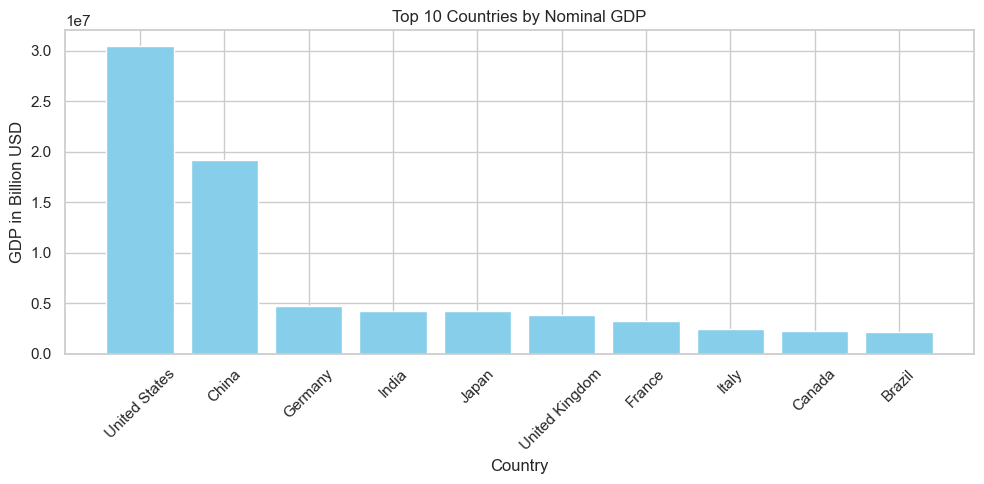

In [11]:
#  Visualize Top 10 Countries (Bar Chart) Using Matplotlib
top10 = df.sort_values("GDP (Billion USD)", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top10["Country"], top10["GDP (Billion USD)"], color="skyblue")
plt.title("Top 10 Countries by Nominal GDP")
plt.xlabel("Country")
plt.ylabel("GDP in Billion USD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("gdp_chart.png", dpi=300, bbox_inches='tight')
plt.show()

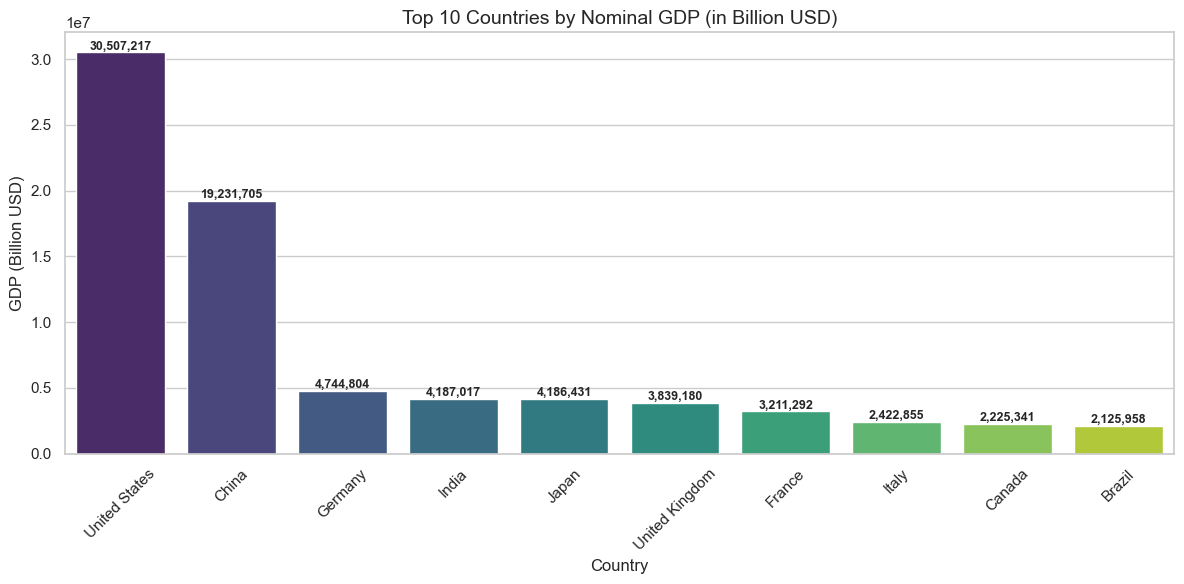

In [12]:
#  Visualize Top 10 Countries (Bar Chart) Using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
chart = sns.barplot(
    data=top10,
    x="Country",
    y="GDP (Billion USD)",
    hue="Country",
    palette="viridis",
    legend=False
)

for bar in chart.patches:
    height = bar.get_height()
    chart.text(
        bar.get_x() + bar.get_width() / 2,
        height + 200,
        f'{height:,.0f}',  
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )
    
plt.title("Top 10 Countries by Nominal GDP (in Billion USD)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP (Billion USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("gdp_chart2.png", dpi=300, bbox_inches='tight')
plt.show()
